<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/%EB%AC%BC%EB%A5%98%EC%9D%98%EC%B5%9C%EC%A0%81%EA%B2%BD%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 창고에 1만개의 상품이 보관
# 전국 대리점에 판매 , 창고가 1개가 아닌 전국 위치 , 공장도 전국 공장에서 
# 물류는 상품의 매출을 좌우하는 중요한 주제

# 물류의 개념을 대리점 뿐 아니라 많은 업계에 응용할 수 있다. 보험, 택시 등등 


# 여기서는 물류의 기초가되는 운송최적화를 검토, 네트워크를 가시화하는 방법 최적 물류 계획


In [ ]:
# 1 데이터 읽어오기 

import pandas as pd

factories = pd.read_csv('tbl_factory.csv', index_col=0) #공장
warehouses= pd.read_csv('tbl_warehouse.csv', index_col=0) #창고
cost = pd.read_csv('rel_cost.csv', index_col=0) # 비용
trans = pd.read_csv('tbl_transaction.csv', index_col=0) # 운송실적

In [ ]:
warehouses

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,판교창고,35,북부
WH00002,용인창고,41,북부
WH00003,수원창고,42,북부
WH00004,대전창고,60,남부
WH00005,대구창고,72,남부
WH00006,광주창고,65,남부


In [ ]:
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [ ]:
cost    # WH????? 창고 에서 FC????? 공장  비용이 0.4

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8
6,FC00002,WH00003,1.6
7,FC00003,WH00001,1.2
8,FC00003,WH00002,1.3
9,FC00003,WH00003,1.5


In [ ]:
trans   # WH????? 창고 에서 FC????? 공장

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,2019-12-31 19:35:07,FC00003,WH00001,36


In [ ]:
join_data = pd.merge(trans, cost, left_on=['ToFC','FromWH'], right_on=['FCID','WHID'], how='left')

join_data

# 공장ID와 창고ID 를 키로해서 연결 , 운송실적을 기준으로 left지정

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8
...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3


In [ ]:
join_data = pd.merge(join_data, factories, left_on=['ToFC'], right_on=['FCID'], how='left')

join_data

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부
...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3,부산공장,25,남부
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6,수원공장,29,북부
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2,인천공장,31,북부
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3,대구공장,21,남부


In [ ]:
join_data = pd.merge(join_data, warehouses, left_on=['FromWH'], right_on=['WHID'], how='left')

join_data

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부,수원창고,42,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부,광주창고,65,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부,대전창고,60,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부,수원창고,42,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부,용인창고,41,북부
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3,부산공장,25,남부,광주창고,65,남부
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6,수원공장,29,북부,수원창고,42,북부
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2,인천공장,31,북부,판교창고,35,북부
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3,대구공장,21,남부,대구창고,72,남부


In [ ]:
# 북부지사와 남부지사 의 데이터를 비교하자 
north = join_data.loc[join_data['WHRegion'] == '북부']
north
south = join_data.loc[join_data['WHRegion'] == '남부']
south

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부,광주창고,65,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부,대전창고,60,남부
5,2019-01-01 08:56:09,FC00005,WH00005,31,FC00005,WH00005,0.3,대구공장,21,남부,대구창고,72,남부
6,2019-01-01 09:00:15,FC00006,WH00006,33,FC00006,WH00006,0.7,광주공장,30,남부,광주창고,65,남부
9,2019-01-01 14:12:51,FC00006,WH00006,21,FC00006,WH00006,0.7,광주공장,30,남부,광주창고,65,남부
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,2019-12-31 03:35:04,FC00006,WH00006,20,FC00006,WH00006,0.7,광주공장,30,남부,광주창고,65,남부
3994,2019-12-31 07:05:56,FC00005,WH00004,11,FC00005,WH00004,0.8,대구공장,21,남부,대전창고,60,남부
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3,부산공장,25,남부,광주창고,65,남부
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3,대구공장,21,남부,대구창고,72,남부


In [ ]:
# 현재 운송량과 비용을 확인해 보자 

print(north['Cost'].sum())
print(south['Cost'].sum())
print()
print(north['Quantity'].sum())
print(south['Quantity'].sum())

2189.3
2062.0

49146
50214


In [ ]:
# Quiz 

#북부와 남부지사의 부품 1개당 운송비용 

# 북부 지사의 부품 1개당 운송비용 : ? 원     총액합계 / 갯수의 합계
# 남부 지사의 부품 1개당 운송비용 : ? 원

tmp = (north['Cost'].sum() / north['Quantity'].sum()) * 10000
print("북부 지사의 부품 1개당 운송비용 : " + str(int(tmp)) +"원")

tmp = (south['Cost'].sum() / south['Quantity'].sum()) * 10000
print("남부 지사의 부품 1개당 운송비용 : " + str(int(tmp)) +"원")

# 각 지사의 평균 운송비용은 거의 같다고 볼수 있으며 북부지사보다 남부지사 쪽이 
# 효율이 높게 부품을 운송하고 있다는 것으로 파악할 수 있다. 

북부 지사의 부품 1개당 운송비용 : 445원
남부 지사의 부품 1개당 운송비용 : 410원


In [ ]:
# 네트워크를 가시화 해보자  주로 사용되는 유명한 라이브러리로 NetworkX 가 있다. 


# NetworkX 기초 사용법
import networkx as nx
import matplotlib.pyplot as plt


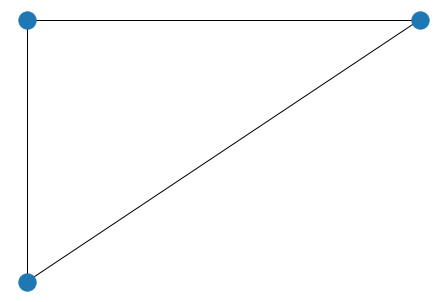

In [ ]:
# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# 엣지 설정
G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

# 좌표 설정
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

# 그리기
nx.draw(G, pos)

plt.show()

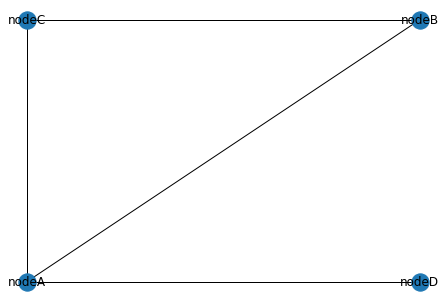

In [ ]:
# 그래프 객체 생성
G = nx.Graph()

# 노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

# 엣지 설정
G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")
G.add_edge("nodeA", "nodeD")

# 좌표 설정
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)
pos["nodeD"]=(1,0)


# 그리기
nx.draw(G, pos, with_labels=True)

plt.show()

In [ ]:
# 경로에 가중치를 부여하자 - 엣지의 굵기를 조정
# 가중치 데이터를 읽어와서 부여하는 방법

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx




In [ ]:
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

In [ ]:
df_w # 가중치

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [ ]:
df_p   # 위치  (노드)

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [ ]:
# 가중치 리스트화 

edge_weights = []

for i in range(len(df_w)):
  for j in range(len(df_w.columns)):
    edge_weights.append(df_w.iloc[i][j]*10)

In [ ]:
edge_weights

[6.39921,
 1.4335300000000002,
 9.44669,
 5.21848,
 0.0,
 2.64556,
 0.0,
 4.5615,
 5.68434,
 0.0,
 6.17635,
 6.12096,
 6.16934,
 9.437479999999999,
 0.0,
 0.0,
 0.0,
 6.97631,
 0.60225,
 6.66767,
 6.706379999999999,
 2.10383,
 0.0,
 3.1542800000000004,
 0.0]

In [ ]:
# 노드 설정
G = nx.Graph()
for i in range(len(df_w.columns)):
  G.add_node(df_w.columns[i])

# 엣지 설정
for i in range(len(df_w.columns)):
  for j in range(len(df_w.columns)):
    G.add_edge(df_w.columns[i],df_w.columns[j])

# 좌표 설정
pos = {}
for i in range(len(df_w.columns)):
  node = df_w.columns[i]
  pos[node] = (df_p[node][0],df_p[node][1])    

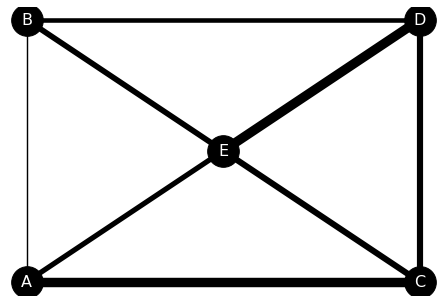

In [ ]:
nx.draw(G, pos, with_labels=True, font_size = 16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

In [ ]:
# trans_route 운송경로
# trans_route_pos 창고와 공장의 위치정보
# trans_cost 운송비용 
# demand 생산량에 대한 수요
# supply 공급 가능한 최대 부품 수 

# trans_route_new 새로 설계한 운송 경로 